In [44]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv("Space_Corrected.xls")
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

In [8]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [9]:
df.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


## Number of Launches by Every Company

In [17]:
ds = df["Company Name"].value_counts().reset_index()[:28]
ds

,index,Company Name
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


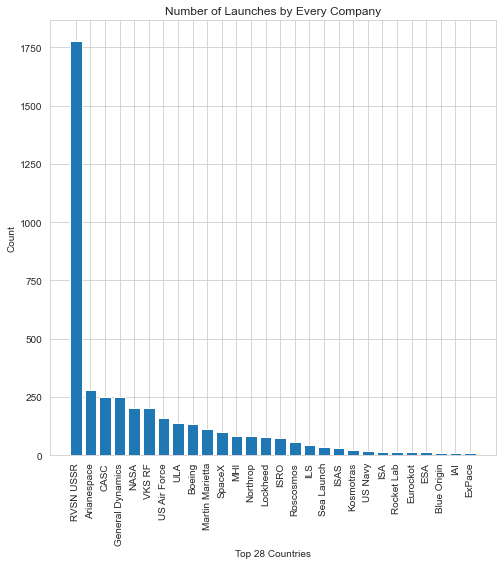

In [33]:
fig, ax = plt.subplots(figsize = (8,8))
ax.bar(ds["index"],ds["Company Name"])
ax.set(title="Number of Launches by Every Company",
      xlabel="Top 28 Countries",
      ylabel = "Count")
plt.xticks(rotation = 90);

## Rocket Status

In [34]:
ds = df["Status Rocket"].value_counts().reset_index()
ds

,index,Status Rocket
0,StatusRetired,3534
1,StatusActive,790


In [47]:
fig = px.pie(ds,values = "Status Rocket", names = "index", title = "Rocket Status")
fig.show()

## Mission Status

In [53]:
ds = df["Status Mission"].value_counts().reset_index()[:3]
ds

,index,Status Mission
0,Success,3879
1,Failure,339
2,Partial Failure,102


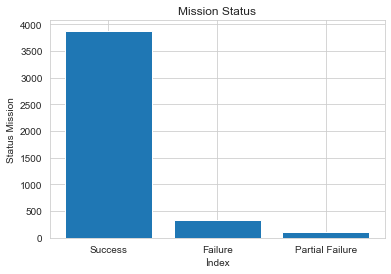

In [54]:
fig, ax = plt.subplots()
ax.bar(ds["index"],ds["Status Mission"])
ax.set(title="Mission Status",
      xlabel="İndex",
      ylabel = "Status Mission");

## Rocket Cost Distribuiton with Rocket Status

In [56]:
df[" Rocket"].isnull().sum()

3360

In [58]:
df_ = df.dropna(subset = [" Rocket"], axis = "rows")
len(df_)

964

In [59]:
df_[" Rocket"].isna().sum()

0

In [60]:
df_[" Rocket"]

0        50.0 
1       29.75 
3        65.0 
4       145.0 
5       64.68 
         ...  
3855     59.0 
3971    63.23 
3993    63.23 
4000    63.23 
4020    63.23 
Name:  Rocket, Length: 964, dtype: object

In [62]:
df_[" Rocket"] = df_[" Rocket"].fillna(0.0).str.replace(",","")
df_[" Rocket"] = df_[" Rocket"].astype("float64").fillna(0.0)
df_[" Rocket"]

0        50.00
1        29.75
3        65.00
4       145.00
5        64.68
         ...  
3855     59.00
3971     63.23
3993     63.23
4000     63.23
4020     63.23
Name:  Rocket, Length: 964, dtype: float64

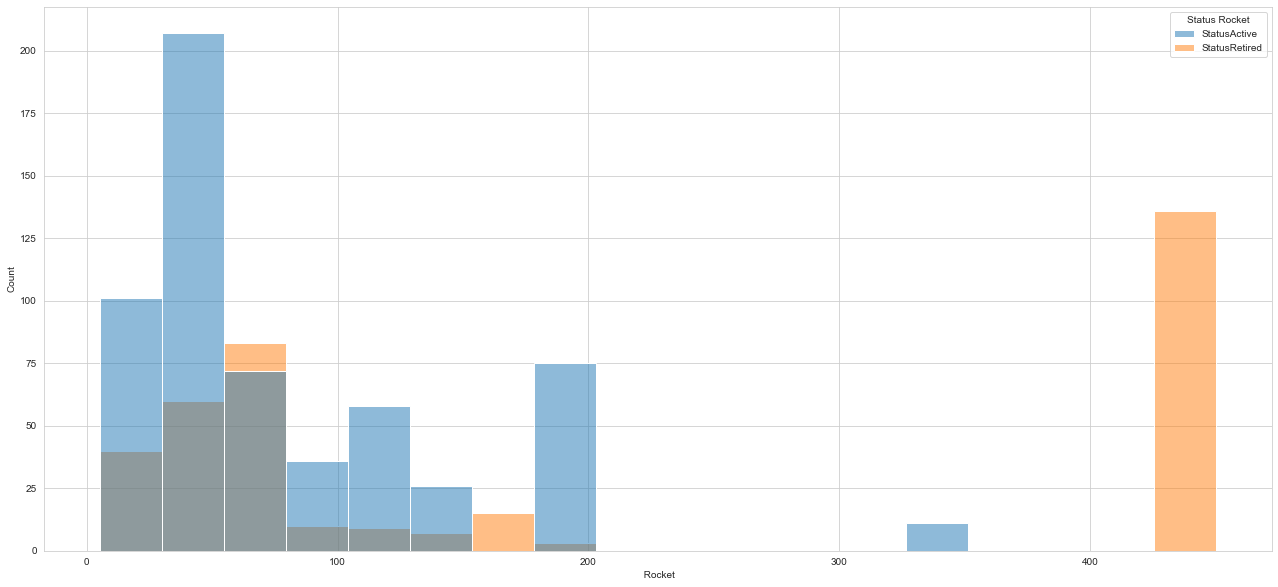

In [67]:
df_d = df_[df_[" Rocket"] < 1000]
plt.figure(figsize=(22,10))
sns.histplot(data = df_d, x = " Rocket", hue = "Status Rocket")
plt.show()